In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# menggunakan Python Imaging Library (PIL)

from PIL import Image 
gbr = Image.open('/content/drive/MyDrive/Pengenalan Pola/img/gbr1.jpeg')
pxl = gbr.load()

# cara mengakses kode warna RGD dari sebuah gambar
x = 3
y = 8
print(pxl[x, y])   # nilai RGB dari pixel (x, y)
print(pxl[x, y][0])  # nilai R dari pixel (x, y)
print(pxl[x, y][1])  # nilai G dari pixel (x, y)
print(pxl[x, y][2])  # nilai B dari pixel (x, y)


(190, 236, 252)
190
236
252


In [46]:
# fungsi citra biner 
# konversi gambar RGB ke grayscale
def citra_biner(th):
    
    path = '/content/drive/MyDrive/Pengenalan Pola/img/gbr1.jpeg'
    rsl = '/content/drive/MyDrive/Pengenalan Pola/img/result/'
    ctr_gs = Image.open(path).convert('L')
    pxl_gs = ctr_gs.load()

    ukuran_hor = ctr_gs.size[0]
    ukuran_ver = ctr_gs.size[1]

    for x in range(ukuran_hor):
        for y in range(ukuran_ver):
            if pxl_gs[x, y] < th:
                pxl_gs[x, y] = 0
            else:
                pxl_gs[x, y] = 255

    save_as = rsl+'gambar_biner_' + str(th) + '.jpeg'
    ctr_gs.save(save_as)


citra_biner(50)
citra_biner(128)
citra_biner(200)
citra_biner(230)

In [12]:
# Fungsi Mengubah Skala Gambar

from PIL import Image
from math import floor

path = '/content/drive/MyDrive/Pengenalan Pola/img/'
hsl = 'result/'
img = 'gbr2.jpeg'
def skala(s):
    ctr = Image.open(path+img)
    pxl = ctr.load()

    ukuran_horizontal = ctr.size[0]
    ukuran_vertikal =ctr.size[1]

    ukuran_horizontal_baru = floor(ukuran_horizontal * s)
    ukuran_vertikal_baru = floor(ukuran_vertikal * s)
    
    ctr_baru = Image.new("RGB", (ukuran_horizontal_baru, ukuran_vertikal_baru))
    pxl_baru = ctr_baru.load()

    for x in range(ukuran_horizontal_baru):
        for y in range(ukuran_vertikal_baru):
            x_lama = ukuran_horizontal * x / ukuran_horizontal_baru
            y_lama = ukuran_vertikal * y / ukuran_vertikal_baru
            pxl_baru[x, y] = pxl[x_lama, y_lama]

    save_as = path+hsl+'gambar_skala_' + str(s).replace('.', ',') + '.jpeg'
    ctr_baru.save(save_as)


skala(0.5)
skala(1.5)
skala(2.0)

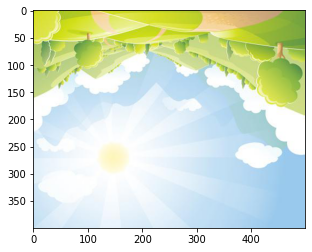

In [27]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline

path = '/content/drive/MyDrive/Pengenalan Pola/img/'
hsl = 'result/'
img_asli = '/content/drive/MyDrive/Pengenalan Pola/img/gbr3.jpeg'

def flipping_vertikal(gambar, save_as):
    ctr = Image.open(gambar)
    pxl = ctr.load()

    ukuran_horizontal = ctr.size[0]
    ukuran_vertikal = ctr.size[1]

    ctr_baru = Image.new("RGB", (ukuran_horizontal, ukuran_vertikal))
    pxl_baru = ctr_baru.load()

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            pxl_baru[x, y] = pxl[x, ukuran_vertikal - 1 - y]

    ctr_baru.save(save_as)


def flipping_horizontal(gambar, save_as):
    ctr = Image.open(gambar)
    pxl = ctr.load()

    ukuran_horizontal = ctr.size[0]
    ukuran_vertikal = ctr.size[1]

    ctr_baru = Image.new("RGB", (ukuran_horizontal, ukuran_vertikal))
    pxl_baru = ctr_baru.load()

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            pxl_baru[x, y] = pxl[ukuran_horizontal - 1 - x, y]

    ctr_baru.save(save_as)

def flipping_titik_asal(gambar, save_as):
    ctr = Image.open(gambar)
    pxl = ctr.load()

    ukuran_horizontal = ctr.size[0]
    ukuran_vertikal = ctr.size[1]

    ctr_baru = Image.new("RGB", (ukuran_horizontal, ukuran_vertikal))
    pxl_baru = ctr_baru.load()

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            pxl_baru[x, y] = pxl[ukuran_horizontal - 1 - x, ukuran_vertikal -1 -y]

    ctr_baru.save(save_as)

flipping_vertikal(img_asli, path+hsl+'gambar_flip_vertikal.jpeg')
flipping_horizontal(img_asli, path+hsl+'gambar_flip_horizontal.jpeg')
flipping_titik_asal(img_asli, path+hsl+'gambar_flip_titik_asal.jpeg')


tampil_asli = Image.open(img_asli, 'r')
imshow(np.asarray(tampil_asli))

flip_ver = Image.open(path+hsl+'gambar_flip_vertikal.jpg', 'r')
imshow(np.asarray(flip_ver))

In [34]:
from PIL import Image

path = '/content/drive/MyDrive/Pengenalan Pola/img/result/'

img_asli = '/content/drive/MyDrive/Pengenalan Pola/img/gbr1.jpeg'

ctr = Image.open(img_asli)

ukuran_horizontal = ctr.size[0]
ukuran_vertikal = ctr.size[1]

pxl = ctr.load()

for x in range(ukuran_horizontal):
    for y in range(ukuran_vertikal):
        R = 255 - pxl[x, y][0]
        G = 255 - pxl[x, y][1]
        B = 255 - pxl[x, y][2]
        pxl[x, y] = (R, G, B)

ctr.save(path+'gambar_negatif.jpeg')


In [36]:
# Fungsi mengatur Kecerahan Gambar
from PIL import Image

path = '/content/drive/MyDrive/Pengenalan Pola/img/result/'
img_asli = '/content/drive/MyDrive/Pengenalan Pola/img/gbr1.jpeg'

def clipping(intensitas):
    if intensitas < 0:
        return 0
    if intensitas > 255:
        return 255
    return intensitas

def atur_pencerahan(nilai_pencerahan, save_as):
    ctr = Image.open(img_asli)
    pxl = ctr.load()

    ukuran_horizontal = ctr.size[0]
    ukuran_vertikal = ctr.size[1]

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            R = clipping(pxl[x, y][0] + nilai_pencerahan)
            G = clipping(pxl[x, y][1] + nilai_pencerahan)
            B = clipping(pxl[x, y][2] + nilai_pencerahan)
            pxl[x, y] = (R, G, B)

    ctr.save(path+save_as)


atur_pencerahan(80, 'gambar_dicerahkan.jpg')
atur_pencerahan(-80, 'gambar_digelapkan.jpg')


In [43]:
# Fungsi untuk Merotasi Gambar
from PIL import Image
from math import sin, cos

path = '/content/drive/MyDrive/Pengenalan Pola/img/result/'
img_asli = '/content/drive/MyDrive/Pengenalan Pola/img/gbr1.jpeg'

def rotasi(derajat):
    ctr = Image.open(img_asli)
    pxl = ctr.load()

    ukuran_horizontal = ctr.size[0]
    ukuran_vertikal = ctr.size[1]

    ctr_baru = Image.new("RGB", (ukuran_horizontal, ukuran_vertikal))
    pxl_baru = ctr_baru.load()

    x_tengah = ukuran_horizontal // 2
    y_tengah = ukuran_vertikal // 2

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            # theta == radian
            theta = derajat * 22/7 / 180

            # rumus rotasi dengan pusat rotasi bebas (disini tengah)
            # sumber: https://homepages.inf.ed.ac.uk/rbf/HIPR2/rotate.htm
            x_baru = (cos(theta) * (x - x_tengah) - sin(theta)
                      * (y - y_tengah) + x_tengah)
            y_baru = (sin(theta) * (x - x_tengah) + cos(theta)
                      * (y - y_tengah) + y_tengah)

            # rumus rotasi dengan pusat rotasi (0, 0)
            # dari buku rinaldi munir
            # x_baru = x*cos(theta) - y*sin(theta)
            # y_baru = x*cos(theta) + y*cos(theta)

            if (x_baru >= ukuran_horizontal or y_baru >= ukuran_vertikal
                    or x_baru < 0 or y_baru < 0):
                pxl_baru[x, y] = (0, 0, 0)
            else:
                pxl_baru[x, y] = pxl[x_baru, y_baru]

    save_as = 'gambar_rotasi_' + str(derajat) + '.jpeg'
    ctr_baru.save(path+save_as)

rotasi(45)
rotasi(90)
rotasi(180)


In [44]:
# Fungsi Translasi
from PIL import Image

path = '/content/drive/MyDrive/Pengenalan Pola/img/result/'
img_asli = '/content/drive/MyDrive/Pengenalan Pola/img/gbr1.jpeg'

def translasi(m, n):
    ctr = Image.open(img_asli)
    pxl = ctr.load()

    ukuran_horizontal = ctr.size[0]
    ukuran_vertikal = ctr.size[1]

    ctr_baru = Image.new("RGB", (ukuran_horizontal, ukuran_vertikal))
    pxl_baru = ctr_baru.load()

    start_m = m
    start_n = n

    if m < 0:
        start_m = 0
    if n < 0:
        start_n = 0

    for x in range(start_m, ukuran_horizontal):
        for y in range(start_n, ukuran_vertikal):
            x_baru = x - m
            y_baru = y - n
       
            if (x_baru >= ukuran_horizontal or y_baru >= ukuran_vertikal or x_baru < 0 or y_baru < 0):
                pxl_baru[x, y] = (0, 0, 0)
            else:
                pxl_baru[x, y]= pxl[x_baru, y_baru]

    save_as = path+'gambar_translasi_' + str(m) + '_' + str(n) +'.jpeg'
    ctr_baru.save(save_as)

translasi(200, 500)
translasi(-200, -500)